<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Tomás Ignacio Reyes Oyarzún

### **Link de repositorio de GitHub:** [Repositorio - TR](https://github.com/TomiReyes/MDS7202-TR)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px
import random
from statsmodels.graphics.tsaplots import plot_pacf

from collections import defaultdict
from copy import deepcopy
from nltk.corpus import stopwords
import nltk

import itertools
from tqdm import tqdm
import logging

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF

from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy
from surprise import NMF
from surprise import accuracy
from surprise import SVD

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [2]:
df = pd.read_csv('energia_homero.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195


In [3]:
fig = px.line(df, x='date', y='Energy_kWh')
fig.show()

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [4]:
train = df[df['date'] <= '2020-02-29']
test = df[df['date'] >= '2020-03-01']

X_train = train[['date']]
y_train = train['Energy_kWh']
X_test = test[['date']]
y_test = test['Energy_kWh']

In [5]:
# Convertir fechas a ordinal para modelar la tendencia
def date_to_ordinal(X):
    return np.array(X['date'].map(lambda x: x.toordinal())).reshape(-1, 1)

# Crear el Pipeline para modelar la tendencia
Pipeline_trend = Pipeline([
    ('date_transform', FunctionTransformer(date_to_ordinal)),
    ('linear_model', LinearRegression())
])

In [6]:
Pipeline_trend.fit(X_train, y_train)

y_train_pred = Pipeline_trend.predict(X_train)
y_test_pred = Pipeline_trend.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'MAE (Entrenamiento): {mae_train}')
print(f'MAE (Prueba): {mae_test}')

fig = px.line(df, x='date', y='Energy_kWh', title='Predicciones del Modelo Lineal')
fig.add_scatter(x=train['date'], y=y_train_pred, mode='lines', name='Predicción (Entrenamiento)')
fig.add_scatter(x=test['date'], y=y_test_pred, mode='lines', name='Predicción (Prueba)')
fig.show()

MAE (Entrenamiento): 10.56815408802557
MAE (Prueba): 8.655813997873539


In [7]:
df['error'] = df['Energy_kWh'] - pd.concat([pd.Series(y_train_pred, index=train.index), 
                                                    pd.Series(y_test_pred, index=test.index)])

fig = px.line(df, x='date', y='error', title='Error del Modelo Lineal')
fig.show()

¿Hay un comportamiento estacional en la serie?

Existe un comportamiento estacional en la serie, en los meses cercanos a julio el error aumenta positivamente y en los meses cercanos a enero se mantiene relativamente estable en valores negativos. 

Para aplicar la función de los términos de Fourier, se establecen 365 periodos porque está hecho en días y se establece en 3 términos. 

In [8]:
def terminos_fourier(X, P=365, n=3):
    """Genera términos de Fourier para la estacionalidad."""
    X_ord = np.array(X['date'].map(lambda x: x.toordinal())).reshape(-1, 1)
    terminos = np.hstack([np.sin(2 * np.pi * i * X_ord / P) for i in range(1, n+1)] +
                      [np.cos(2 * np.pi * i * X_ord / P) for i in range(1, n+1)])
    return terminos

Pipeline_seasonal = Pipeline([
    ('fourier_transform', FunctionTransformer(lambda X: terminos_fourier(X, P=365, n=3))),
    ('linear_model', LinearRegression())
])

In [9]:
Pipeline_seasonal.fit(X_train, y_train)

y_train_pred_seasonal = Pipeline_seasonal.predict(X_train)
y_test_pred_seasonal = Pipeline_seasonal.predict(X_test)


mae_train_seasonal = mean_absolute_error(y_train, y_train_pred_seasonal)
mae_test_seasonal = mean_absolute_error(y_test, y_test_pred_seasonal)

print(f'MAE Estacional (Entrenamiento): {mae_train_seasonal}')
print(f'MAE Estacional (Prueba): {mae_test_seasonal}')

fig = px.line(df, x='date', y='Energy_kWh', title='Predicciones con Términos de Fourier')
fig.add_scatter(x=train['date'], y=y_train_pred_seasonal, mode='lines', name='Predicción (Entrenamiento)')
fig.add_scatter(x=test['date'], y=y_test_pred_seasonal, mode='lines', name='Predicción (Prueba)')
fig.show()


MAE Estacional (Entrenamiento): 5.408663097283894
MAE Estacional (Prueba): 4.262687676321244


In [10]:
df['error_seasonal'] = df['Energy_kWh'] - pd.concat(
    [pd.Series(y_train_pred_seasonal, index=train.index), 
     pd.Series(y_test_pred_seasonal, index=test.index)]
)

fig = px.line(df, x='date', y='error_seasonal', title='Error del Modelo Estacional')
fig.show()

Vuelva a graficar el error y comente los resultados.

Si bien los errores aumentan en los meses cercanos a julio, están más centrados en el 0 y la estacionalidad tiene menos impacto, por lo que es más uniforme a lo largo de todo el periodo. Por lo tanto, aplicando el pipeline para evitar estacionalidad se obtienen mejores resultados.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

**Respuesta:**

In [11]:
train = train.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test = test.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

In [12]:
m = Prophet()
m.fit(train)

future = m.make_future_dataframe(periods=len(test), freq='D')  
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

02:02:24 - cmdstanpy - INFO - Chain [1] start processing
02:02:24 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2016-06-01,33.887963,25.038181,42.298135
1,2016-06-02,34.514968,25.062285,42.715361
2,2016-06-03,34.816294,25.982616,43.669204
3,2016-06-04,37.113386,27.774532,45.879533
4,2016-06-05,38.276200,29.308024,46.801581


/var/folders/bv/rkq_ppwn0kddqwvx0g_5c1tw0000gp/T/ipykernel_7151/3774601301.py:2: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

/var/folders/bv/rkq_ppwn0kddqwvx0g_5c1tw0000gp/T/ipykernel_7151/3774601301.py:5: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



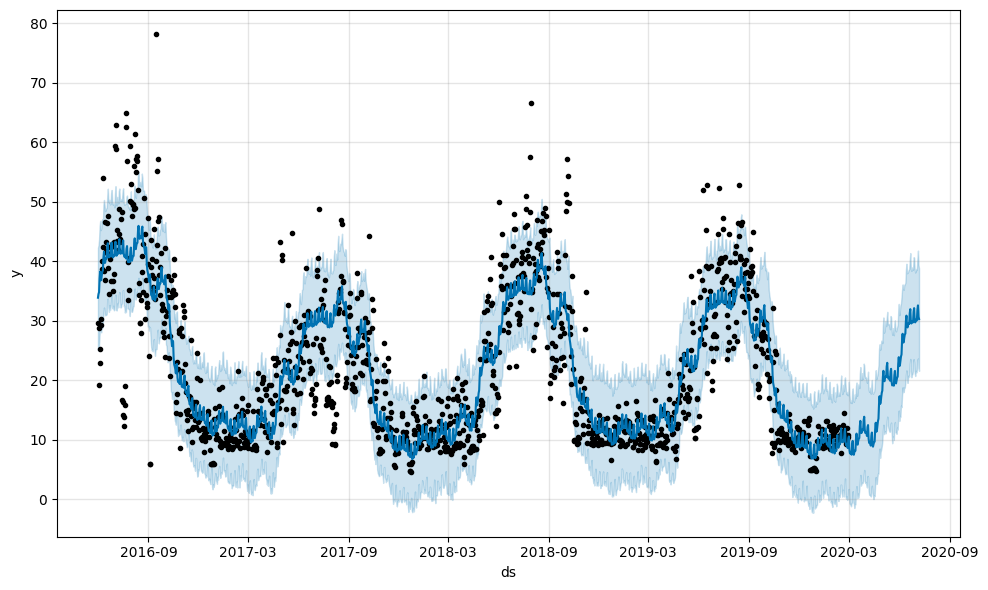

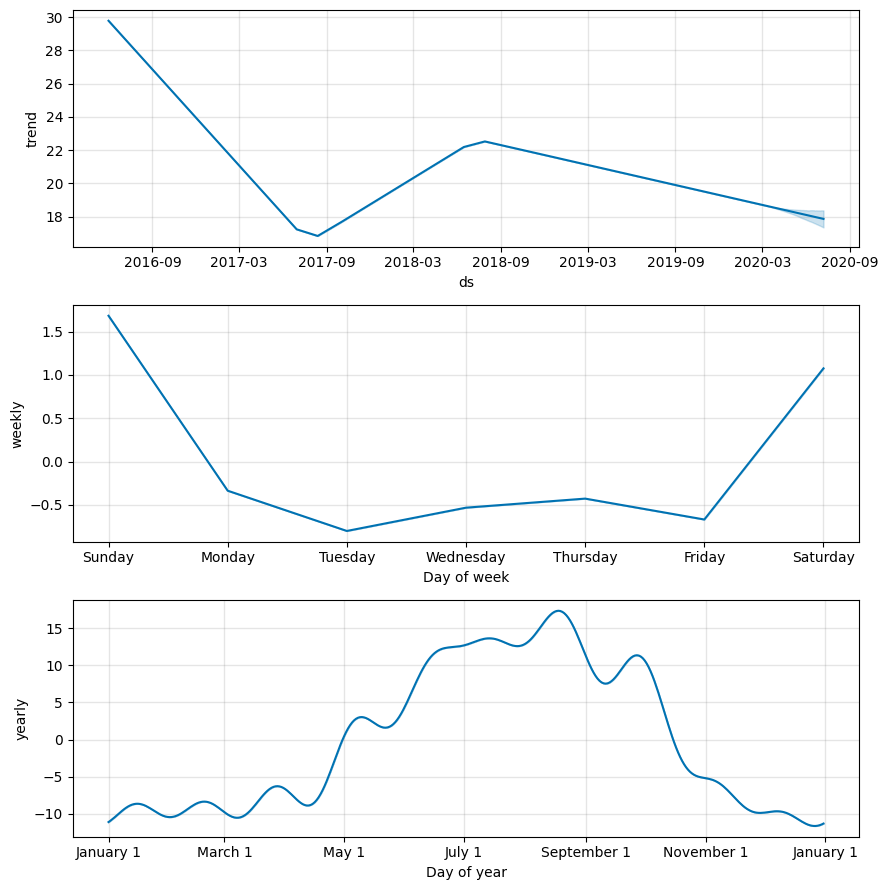

In [13]:
fig1 = m.plot(forecast)
fig1.show()

fig2 = m.plot_components(forecast)
fig2.show()

In [14]:
test_forecast = forecast[forecast['ds'].isin(test['ds'])]

mae_train = mean_absolute_error(train['y'], forecast.loc[forecast['ds'].isin(train['ds']), 'yhat'])
mae_test = mean_absolute_error(test['y'], test_forecast['yhat'])

print(f'MAE (Entrenamiento): {mae_train}')
print(f'MAE (Prueba): {mae_test}')

MAE (Entrenamiento): 4.820008658436316
MAE (Prueba): 4.877743623246392


In [15]:
df['error'] = df['Energy_kWh'] - forecast.loc[forecast['ds'].isin(df['date']), 'yhat'].values

fig = px.line(df, x='date', y='error', title='Error del Modelo Prophet')
fig.show()

¿Hay un comportamiento estacional en la serie? 

Al igual que los últimos casos, los errores aumentan en los meses cercanos a julio, por lo que se podría argumentar una estacionalidad. Que es menor que los casos lineales, pero se podría mejorar para evitar un resultado estacional.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [16]:
frink = pd.read_csv('datos_frink.csv')

frink0 = frink.drop(columns=['date'])
correlation_matrix = frink0.corr()

correlation_long = correlation_matrix.reset_index().melt(id_vars='index')
correlation_long.columns = ['Variable 1', 'Variable 2', 'Correlación']

fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    aspect="auto",
    title='Matriz de Correlación de las Variables',
    color_continuous_scale='RdBu_r',
    zmin=-1, zmax=1
)

fig.show()

Se seleccionan las variables que tienen mayor representativad de las variables, es decir, las que tienen alta correlación solo se selecciona 1, como el caso de las variables de temperatura y de rocío, que solo se selecciona el valor de promedio de temperatura. Del mismo modo, se selecciona el promedio de humedad, de velocidad del viento y de la presión.

In [17]:
var_merge = frink[["date", "Temp_avg", "Hum_avg", "Wind_avg", "Press_avg"]].copy()
var_merge['date'] = pd.to_datetime(var_merge['date'])
var_merge.head()

,date,Temp_avg,Hum_avg,Wind_avg,Press_avg
0,2016-06-01,74.8,89.4,9.5,29.8
1,2016-06-02,71.2,96.8,7.8,29.8
2,2016-06-03,72.1,93.6,4.7,29.8
3,2016-06-04,71.2,96.1,7.0,29.7
4,2016-06-05,73.8,88.7,7.7,29.7


In [18]:
train = pd.merge(train, var_merge, how='left', left_on='ds', right_on='date').drop(columns=['date'])
test = pd.merge(test, var_merge, how='left', left_on='ds', right_on='date').drop(columns=['date'])

In [19]:
model = Prophet()

variables_exogenas = ['Temp_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']
for var in variables_exogenas:
    model.add_regressor(var)

model.fit(train)

02:02:25 - cmdstanpy - INFO - Chain [1] start processing
02:02:25 - cmdstanpy - INFO - Chain [1] done processing


/var/folders/bv/rkq_ppwn0kddqwvx0g_5c1tw0000gp/T/ipykernel_7151/3875395653.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

/var/folders/bv/rkq_ppwn0kddqwvx0g_5c1tw0000gp/T/ipykernel_7151/3875395653.py:9: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



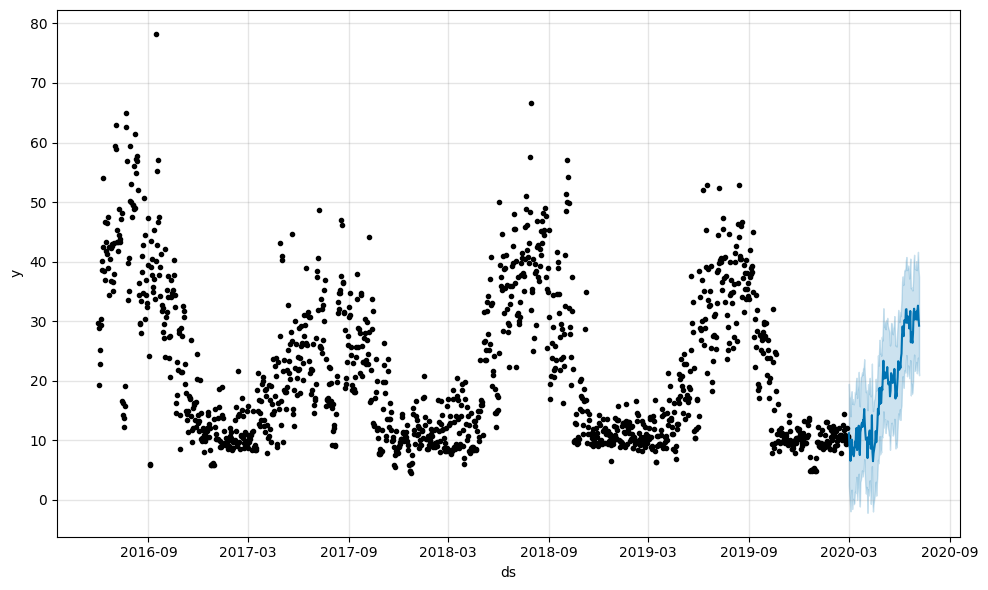

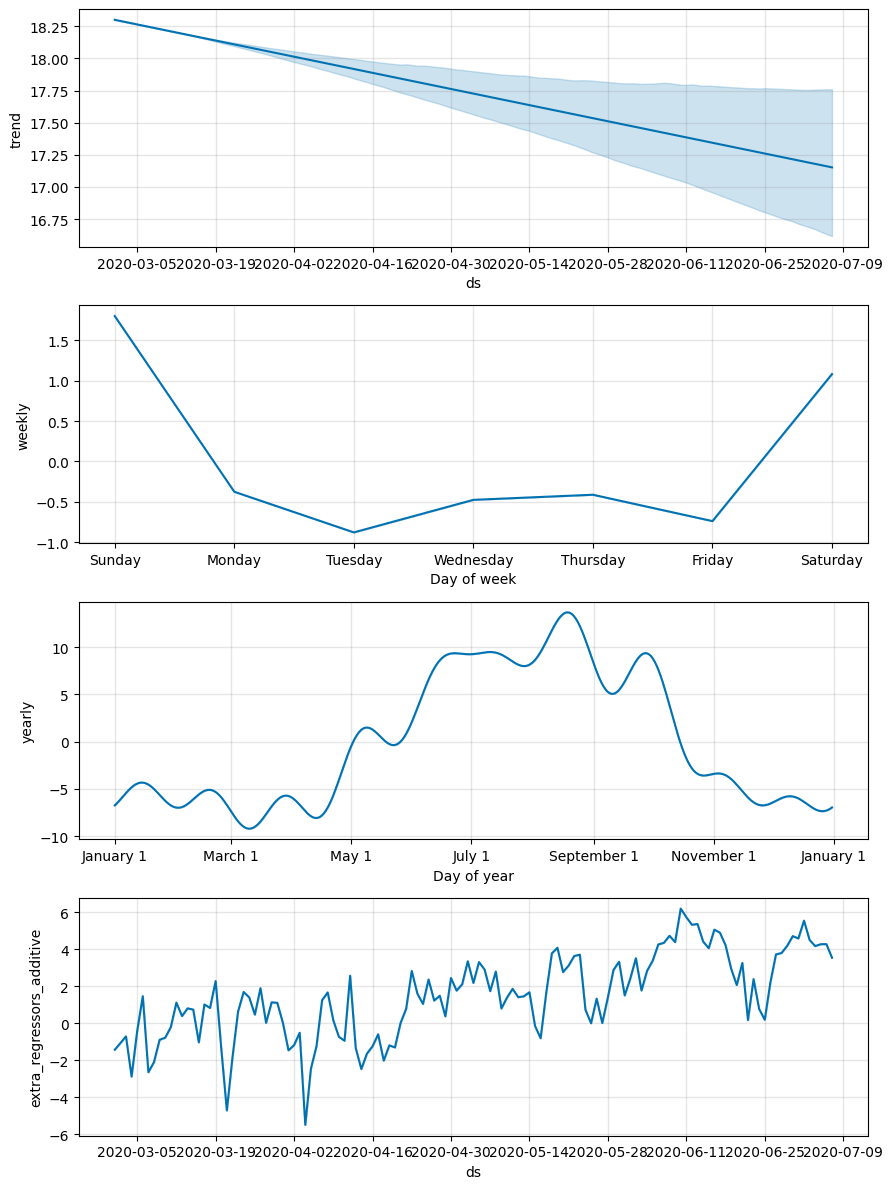

In [20]:
future = test[['ds'] + variables_exogenas]

forecast = model.predict(future)

fig1 = model.plot(forecast)
fig1.show()

fig2 = model.plot_components(forecast)
fig2.show()

In [21]:
train_forecast = model.predict(train[['ds'] + variables_exogenas])

mae_train = mean_absolute_error(train['y'], train_forecast['yhat'])
mae_test = mean_absolute_error(test['y'], forecast['yhat'])

print(f'MAE (Entrenamiento): {mae_train}')
print(f'MAE (Prueba): {mae_test}')

MAE (Entrenamiento): 4.741428385478698
MAE (Prueba): 4.53842002559655


In [22]:
train['error'] = train['y'] - train_forecast['yhat']
test['error'] = test['y'] - forecast['yhat']

error_df = pd.concat([train[['ds', 'error']], test[['ds', 'error']]])

fig = px.line(error_df, x='ds', y='error', title='Error del Modelo Prophet con Regresores')
fig.show()

 ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero?.

La serie se regulariza respecto al último gráfico, los errores están más centrados respecto al 0. Se podría argumentar el aumento en los meses de julio como una estacionalidad, pero el impacto es menor utilizando los regresores, por lo que incorporar estas variables influyen en el comportamiento del consumo energético.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

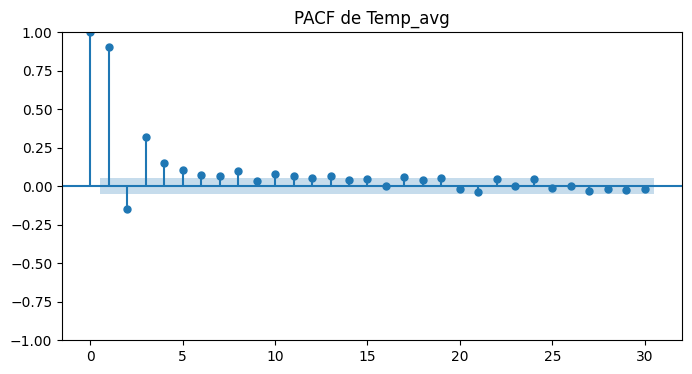

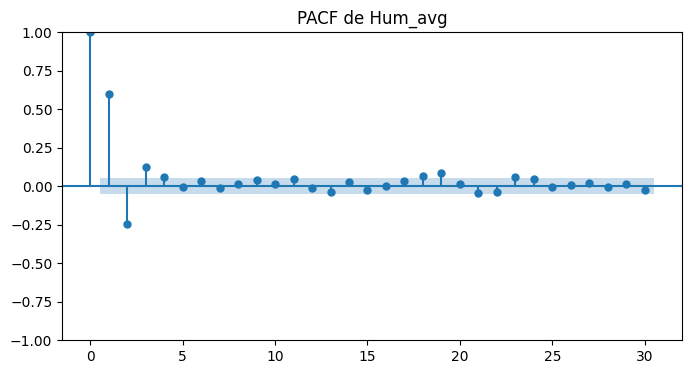

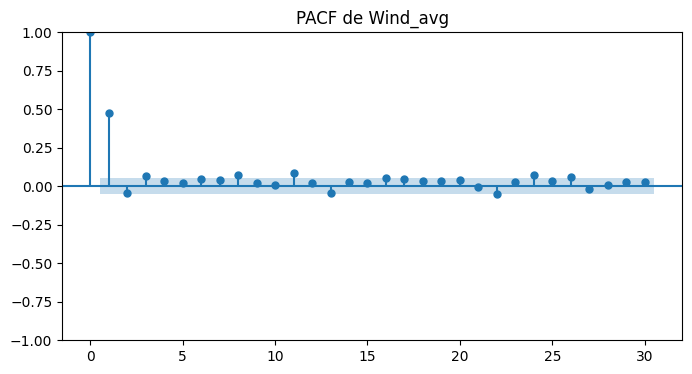

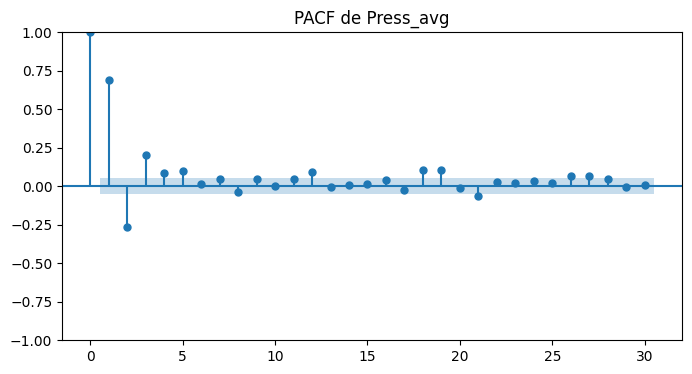

In [23]:
variables_avg = ['Temp_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']

for var in variables_avg:
    fig, ax = plt.subplots(figsize=(8, 4))
    plot_pacf(train[var], ax=ax, lags=30, title=f'PACF de {var}')
    plt.show()

Para agregar los lags, se observan los valores donde el valor pierde significancia, es decir, en el caso donde es cercano al intervalos de confianza se considera que ya no tiene importancia, por lo que se considera hasta el periodo anterior. El caso de temperatura el 3er periodo ya tiene baja significancia, por lo tanto, se consideran 2 lags, el resto de casos la justificación es la misma.

In [24]:
variables_lags = {
    'Temp_avg': 2,
    'Hum_avg': 3,
    'Wind_avg': 2,
    'Press_avg': 3
}

for var, n_lags in variables_lags.items():
    for lag in range(1, n_lags + 1):
        train[f'{var}_lag{lag}'] = train[var].shift(lag)
        test[f'{var}_lag{lag}'] = test[var].shift(lag)

for col in train.columns:
    if 'lag' in col:  
        train[col].fillna(train[col].mean(), inplace=True)
        test[col].fillna(test[col].mean(), inplace=True)

In [25]:
model = Prophet()

for var in variables_lags:
    model.add_regressor(var) 
    for lag in range(1, variables_lags[var] + 1):
        model.add_regressor(f'{var}_lag{lag}') 

model.fit(train)

02:02:26 - cmdstanpy - INFO - Chain [1] start processing
02:02:27 - cmdstanpy - INFO - Chain [1] done processing


/var/folders/bv/rkq_ppwn0kddqwvx0g_5c1tw0000gp/T/ipykernel_7151/2634513470.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

/var/folders/bv/rkq_ppwn0kddqwvx0g_5c1tw0000gp/T/ipykernel_7151/2634513470.py:10: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



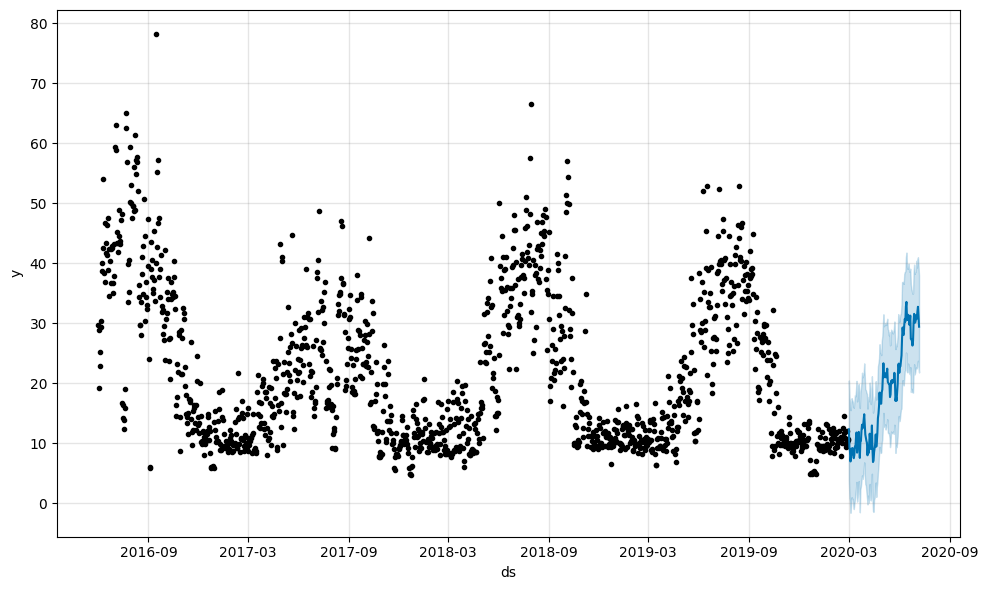

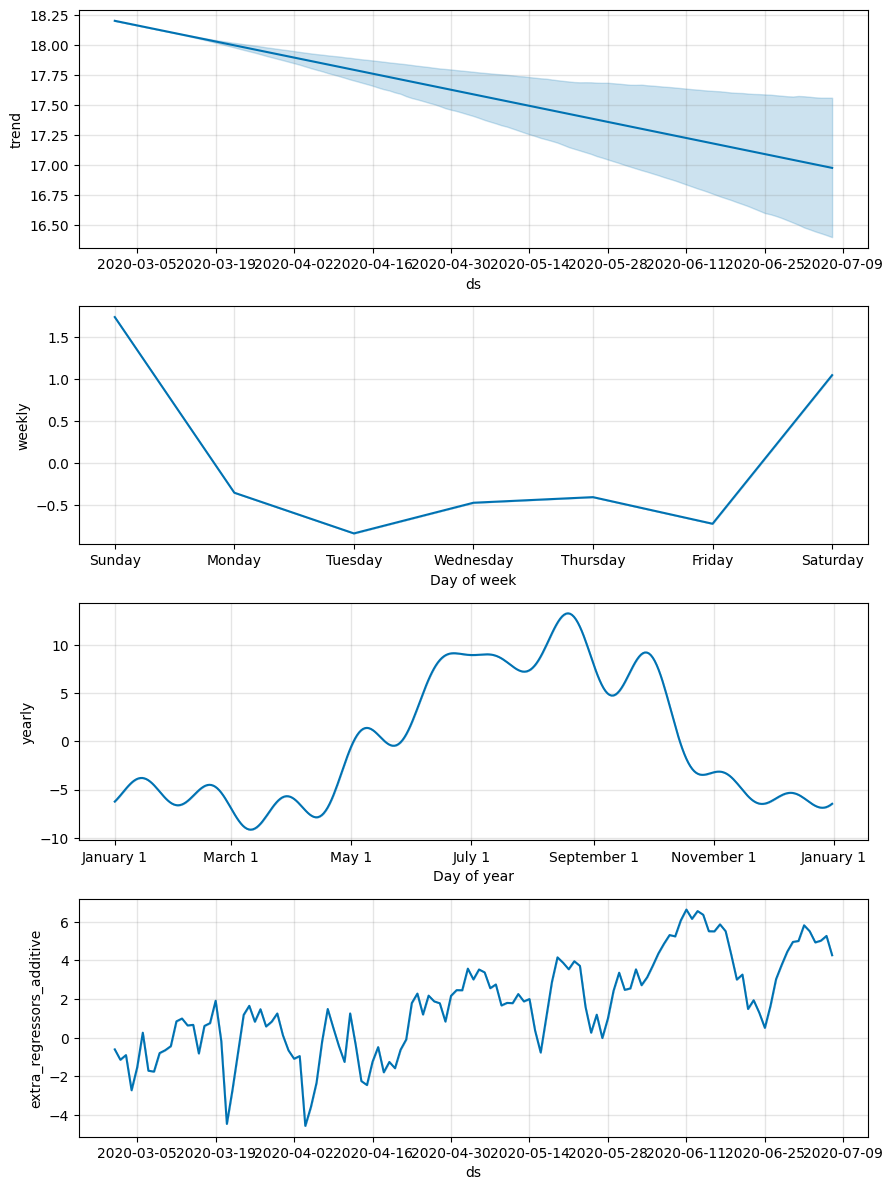

In [26]:
future = test[['ds'] + list(variables_lags.keys()) + 
              [f'{var}_lag{lag}' for var, n_lags in variables_lags.items() for lag in range(1, n_lags + 1)]]

forecast = model.predict(future)

fig1 = model.plot(forecast)
fig1.show()

fig2 = model.plot_components(forecast)
fig2.show()

In [27]:
train_forecast = model.predict(train[['ds'] + list(variables_lags.keys()) + 
                                     [f'{var}_lag{lag}' for var, n_lags in variables_lags.items() for lag in range(1, n_lags + 1)]])

mae_train = mean_absolute_error(train['y'], train_forecast['yhat'])
mae_test = mean_absolute_error(test['y'], forecast['yhat'])

print(f'MAE (Entrenamiento): {mae_train}')
print(f'MAE (Prueba): {mae_test}')

MAE (Entrenamiento): 4.717042912806432
MAE (Prueba): 4.528278007035513


In [28]:
train['error'] = train['y'] - train_forecast['yhat']
test['error'] = test['y'] - forecast['yhat']

error_df = pd.concat([train[['ds', 'error']], test[['ds', 'error']]])

fig = px.line(error_df, x='ds', y='error', title='Error del Modelo Prophet con Lags')
fig.show()

¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo?

La conclusión es identica hasta antes de incorporar los lags, los valores están centrados en el 0, donde se podría argumentar una estacionalidad en los meses de julio pero no de gran impacto. Agregar los lags no tuvo impacto en el desempeño del modelo.

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [29]:
#NO MODIFICAR ESTA CELDA

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [66]:
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],  
    'seasonality_prior_scale': [1.0, 5.0, 15.0],  
    'seasonality_mode': ['additive', 'multiplicative'],  
    'changepoint_range': [0.8, 0.9]  
}

In [68]:
features = ['Temp_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']

tuning_results, best_params = optimize_prophet(train, test, features, param_grid)

print("Mejores parámetros encontrados:")
print(best_params)

Tuning Prophet parameters: 100%|██████████| 36/36 [00:15<00:00,  2.31it/s]

Mejores parámetros encontrados:
{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 15.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}


In [69]:
model = Prophet(**best_params)

for feature in features:
    model.add_regressor(feature)

model.fit(train)

/var/folders/bv/rkq_ppwn0kddqwvx0g_5c1tw0000gp/T/ipykernel_7151/1082143299.py:8: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

/var/folders/bv/rkq_ppwn0kddqwvx0g_5c1tw0000gp/T/ipykernel_7151/1082143299.py:11: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



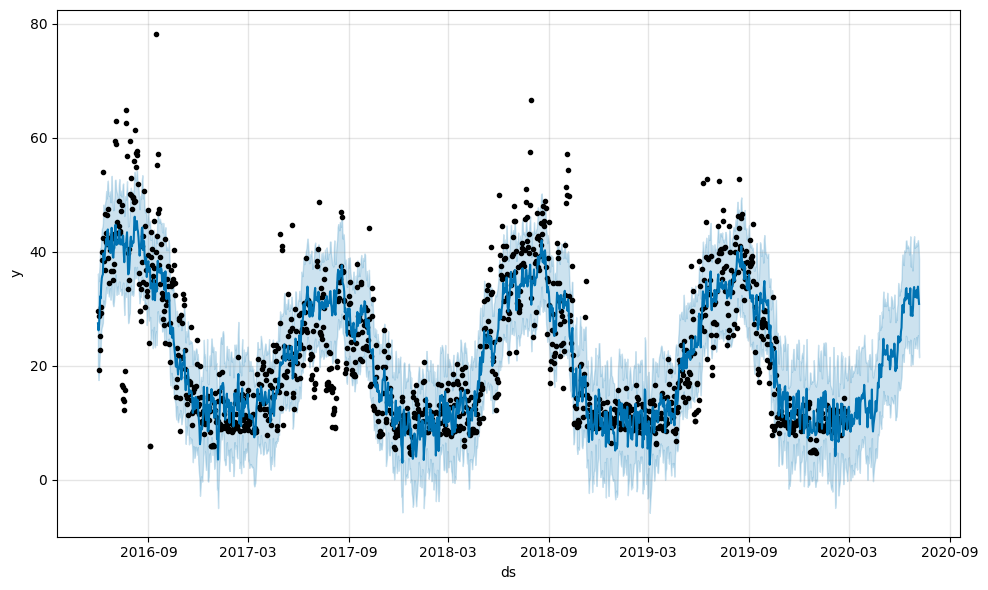

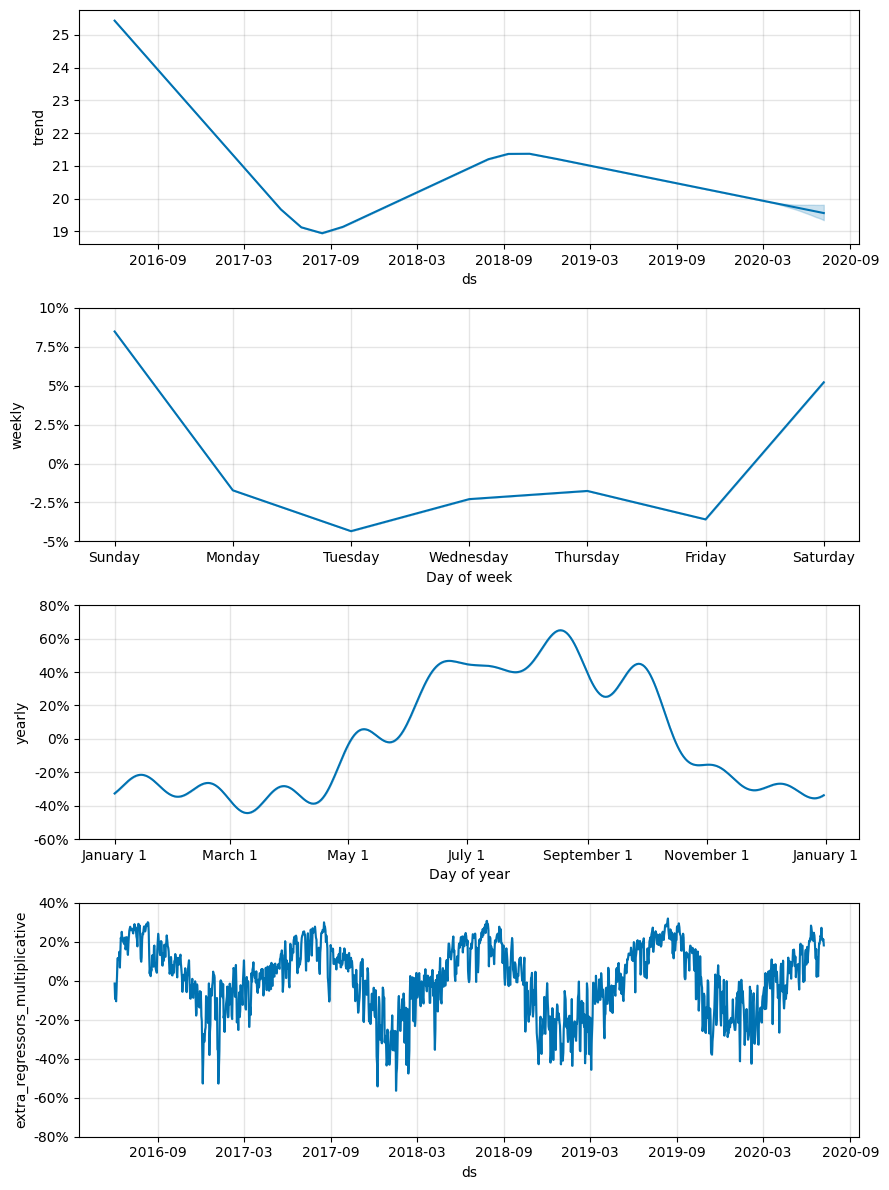

In [70]:
future = model.make_future_dataframe(periods=len(test), freq='D')

future[features] = pd.concat([train[features], test[features]]).reset_index(drop=True)

forecast = model.predict(future)

fig1 = model.plot(forecast)
fig1.show()

fig2 = model.plot_components(forecast)
fig2.show()

In [71]:
# Predicciones para el conjunto de entrenamiento
train_forecast = model.predict(train[['ds'] + features])

# Calcular MAE para ambos conjuntos
mae_train = mean_absolute_error(train['y'], train_forecast['yhat'])
mae_test = mean_absolute_error(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])

print(f'MAE (Entrenamiento): {mae_train}')
print(f'MAE (Prueba): {mae_test}')

MAE (Entrenamiento): 4.832435367405284
MAE (Prueba): 4.066847742730165


In [72]:
forecast_test = forecast[forecast['ds'].isin(test['ds'])].set_index('ds')
test = test.set_index('ds')

# Alinear ambos DataFrames por fecha para evitar NaN
forecast_test = forecast_test.reindex(test.index)

# Calcular el error (Valor real - Valor predicho) en ambos conjuntos
train['error'] = train['y'] - train_forecast['yhat']
test['error'] = test['y'] - forecast_test['yhat']

test.reset_index(inplace=True)

# Combinar los errores en un solo DataFrame para graficar
error_df = pd.concat([train[['ds', 'error']], test[['ds', 'error']]])

fig = px.line(error_df, x='ds', y='error', title='Error del Modelo Prophet')
fig.show()


Analice sus resultados. 

Con todo lo aplicado, se obtiene que la predicción de la serie tiene menos errores, están más centrados en el cero y salvo casos puntuales de septiembre de 2016, los errores no son considerables, por lo que todo lo aplicado tiene un buen resultado y permitiría tener una predicción aplicable.

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [36]:
df = pd.read_csv('cervezas.csv')
df.head(2)

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale


In [37]:
df.isna().sum()

userId       0
beerId       0
rating       0
beerName     0
beerStyle    0
dtype: int64

In [38]:
print(df["beerId"].nunique())
print(df["userId"].nunique())

3747
706


## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

In [39]:
print(f'Hay {df.shape[0]} datos')
print(f'Hay {df["userId"].nunique()} usuarios, {df["beerId"].nunique()} cervezas y {df["beerStyle"].nunique()} tipos de cervezas')
print(df["rating"].value_counts())
print(f'Hay {df["rating"].isna().sum()} calificaciones faltantes')

Hay 295059 datos
Hay 706 usuarios, 3747 cervezas y 101 tipos de cervezas
rating
4.0    110262
4.5     64250
3.5     53717
3.0     28363
5.0     18939
2.5      9541
2.0      6228
1.5      2004
1.0      1755
Name: count, dtype: int64
Hay 0 calificaciones faltantes


In [40]:
df.describe()

,userId,beerId,rating
count,295059.000000,295059.000000,295059.000000
mean,2201.510247,17498.665684,3.860367
std,4577.423286,19971.480254,0.702807
min,1.000000,5.000000,1.000000
25%,132.000000,1185.000000,3.500000
50%,293.000000,6314.000000,4.000000
75%,1141.000000,33639.000000,4.500000
max,27681.000000,75086.000000,5.000000


  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero esta buscando nuevas cervezas para su consumo personal, donde usted pudo notar que Homero esta identificado como `userId = 100` en el dataset. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Homero (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [41]:
beer_features = df[['userId', 'beerId', 'beerName', 'beerStyle']]
beer_features = beer_features.drop_duplicates()

In [42]:
nltk.download('stopwords')
english_stopwords = stopwords.words('english')

vectorizer = CountVectorizer(
    lowercase=True,                      
    stop_words=english_stopwords,         
    min_df=10                            
)

X = vectorizer.fit_transform(beer_features['beerStyle'])

bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

bag_of_words_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomasreyes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,adjunct,ale,altbier,amber,american,apa,baltic,barleywine,beer,belgian,...,vienna,warmer,wee,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
def top_similar_beers_to_query(query, df, bag_of_words_df):
    query_vector = vectorizer.transform([query]).toarray()

    similarities = cosine_similarity(bag_of_words_df, query_vector)

    similar_indices = similarities[:, 0].argsort()[::-1][:5]

    return df.iloc[similar_indices][['beerName', 'beerStyle', 'beerId']]

In [44]:
top_similar_beers_to_query('Chocolate Porter', beer_features, bag_of_words_df)

,beerName,beerStyle,beerId
605,Victory At Sea Coffee Vanilla Imperial Porter,American Porter,48505
709,Pipeline Porter,American Porter,33183
14978,Foothills Baltic Porter,Baltic Porter,33033
19640,Benchwarmer Porter,English Porter,176
9464,"December 6th, 1855 EIP",English Porter,68662


In [45]:
homero = df[df["userId"] == 100]
homero.sort_values(by="rating", ascending=False).head()

,userId,beerId,rating,beerName,beerStyle
178444,100,325,4.5,McNeill's Firehouse Amber Ale,American Amber / Red Ale
44395,100,325,4.5,McNeill's Firehouse Amber Ale,American Amber / Red Ale
164471,100,325,4.5,McNeill's Firehouse Amber Ale,American Amber / Red Ale
118399,100,48798,4.5,McNeill's Warlord Imperial IPA,American Double / Imperial IPA
191517,100,325,4.5,McNeill's Firehouse Amber Ale,American Amber / Red Ale


In [46]:
top_similar_beers_to_query("McNeill's Firehouse Amber Ale", beer_features, bag_of_words_df)

,beerName,beerStyle,beerId
17512,Black Dog Ale,American Amber / Red Ale,36731
983,Hedonism Ale,American Amber / Red Ale,22502
24530,Trout River Rainbow Red Ale,American Amber / Red Ale,2737
1018,Ruedrich's Red Seal Ale,American Amber / Red Ale,410
1020,Lagunitas Lucky 13 Mondo Large Red Ale,American Amber / Red Ale,35397


## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

No es necesario el orden, ya que durante el entrenamiento de definen los identificadores.

In [47]:
df_surprise = df[['userId', 'beerId', 'rating']]

reader = Reader(rating_scale=(df_surprise['rating'].min(), df_surprise['rating'].max()))

data = Dataset.load_from_df(df_surprise, reader)

In [48]:
trainset, testset = train_test_split(data, test_size=0.3, random_state=10)

In [49]:
sim_options = {
    'name': 'cosine',
    'user_based': True  
}

knn_user_model = KNNBasic(sim_options=sim_options)

knn_user_model.fit(trainset)

predictions_user = knn_user_model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [50]:
mae_user = accuracy.mae(predictions_user)
print(f'MAE (KNN basado en usuarios): {mae_user}')

predictions_user_df = pd.DataFrame([{
    'userId': pred.uid, 
    'beerId': pred.iid, 
    'rating_real': pred.r_ui, 
    'rating_predicho': pred.est
} for pred in predictions_user])

predictions_user_df.head()

MAE:  0.4627
MAE (KNN basado en usuarios): 0.46265390283957186


,userId,beerId,rating_real,rating_predicho
0,3818,49286,4.0,4.037500
1,17981,47022,5.0,4.262500
2,1401,3708,3.5,3.758065
3,35,47364,3.5,3.350000
4,735,52510,4.0,3.650000


In [51]:
sim_options = {
    'name': 'cosine',
    'user_based': False  
}

knn_item_model = KNNBasic(sim_options=sim_options)

knn_item_model.fit(trainset)

predictions_item = knn_item_model.test(testset)

mae_item = accuracy.mae(predictions_item)
print(f'MAE (KNN basado en productos): {mae_item}')

predictions_item_df = pd.DataFrame([{
    'userId': pred.uid, 
    'beerId': pred.iid, 
    'rating_real': pred.r_ui, 
    'rating_predicho': pred.est
} for pred in predictions_item])

predictions_item_df.head()

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.4622
MAE (KNN basado en productos): 0.4621760147730424


,userId,beerId,rating_real,rating_predicho
0,3818,49286,4.0,4.037500
1,17981,47022,5.0,4.262500
2,1401,3708,3.5,3.758065
3,35,47364,3.5,3.350000
4,735,52510,4.0,3.650000


### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [52]:
nmf_model = NMF(random_state=10)

nmf_model.fit(trainset)

predictions_nmf = nmf_model.test(testset)

In [53]:
mae_nmf = accuracy.mae(predictions_nmf)
print(f'MAE del modelo NMF: {mae_nmf}')

predictions_nmf_df = pd.DataFrame([{
    'userId': pred.uid, 
    'beerId': pred.iid, 
    'rating_real': pred.r_ui, 
    'rating_predicho': pred.est
} for pred in predictions_nmf])

predictions_nmf_df.head()

MAE:  0.4795
MAE del modelo NMF: 0.47948953242747144


,userId,beerId,rating_real,rating_predicho
0,3818,49286,4.0,3.849649
1,17981,47022,5.0,4.261998
2,1401,3708,3.5,3.837349
3,35,47364,3.5,3.392688
4,735,52510,4.0,3.734136


In [54]:
svd_model = SVD(random_state=10)

svd_model.fit(trainset)

predictions_svd = svd_model.test(testset)

In [55]:
mae_svd = accuracy.mae(predictions_svd)
print(f'MAE del modelo SVD: {mae_svd}')

predictions_svd_df = pd.DataFrame([{
    'userId': pred.uid, 
    'beerId': pred.iid, 
    'rating_real': pred.r_ui, 
    'rating_predicho': pred.est
} for pred in predictions_svd])

predictions_svd_df.head()

MAE:  0.4604
MAE del modelo SVD: 0.46040247965774134


,userId,beerId,rating_real,rating_predicho
0,3818,49286,4.0,4.044205
1,17981,47022,5.0,4.424107
2,1401,3708,3.5,3.787328
3,35,47364,3.5,3.347383
4,735,52510,4.0,3.734775


In [56]:
print(f"MAE del modelo NMF: {mae_nmf}")
print(f"MAE del modelo SVD: {mae_svd}")

MAE del modelo NMF: 0.47948953242747144
MAE del modelo SVD: 0.46040247965774134
El modelo SVD es el mejor basado en MAE.


Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. 

Observando la métrica que se utilizó, el modelo SVD es mejor, ya que tiene menor MAE, por lo que en adelante se considera el mejor modelo.

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Homero (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Homero, para estimar las calificaciones que Homero podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]

In [57]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [58]:
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    
    for uid, iid, true_r, est, _ in predictions:
        if iid not in [beer_id for beer_id, _ in top_n[uid]]:  
            top_n[uid].append((iid, est))
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

top_n = get_top_n(predictions_svd, n=3)
print(f"Top 3 cervezas recomendadas para Homero: {top_n[100]}")

Top 3 cervezas recomendadas para Homero: [(1393, 3.882447020937288), (325, 3.8081514731638464), (48798, 3.706084630860003)]


In [59]:
all_beers = set(beer_features['beerId'].unique())
homero_rated = set(beer_features[beer_features['userId'] == 100]['beerId'])
beers_not_rated = list(all_beers - homero_rated)

random_beers = random.sample(beers_not_rated, 5)

predictions = [svd_model.predict(100, beer) for beer in random_beers]
print("Predicciones para cervezas no evaluadas por Homero:")
for pred in predictions:
    print(f"Cerveza {pred.iid}, Rating estimado: {pred.est}")

Predicciones para cervezas no evaluadas por Homero:
Cerveza 2178, Rating estimado: 3.688206543841361
Cerveza 2999, Rating estimado: 3.7228860515366096
Cerveza 774, Rating estimado: 3.700542201918138
Cerveza 2018, Rating estimado: 3.732010710766764
Cerveza 61506, Rating estimado: 3.577365037146272


In [76]:
precisions, recalls = precision_recall_at_k(predictions_svd)

precision_avg = sum(precisions.values()) / len(precisions)
recall_avg = sum(recalls.values()) / len(recalls)

print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")

Precisión@: 0.7388
Recall@: 0.3377


¿Es un buen modelo?

El modelo tiene un buen valor de precision pero bajo rendimiento en recall. Tiene un amplio espacio de mejora, pero con su estado actual permite obtener conclusiones respecto a la recomendación de cervezas. Es un modelo decente, hay que mejorarlo para que sea bueno.

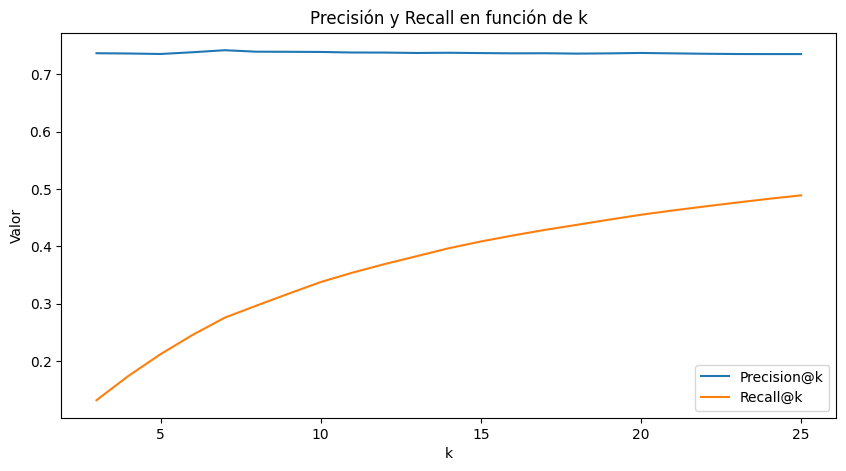

In [61]:
precisions_list = []
recalls_list = []
k_values = range(3, 26)

for k in k_values:
    precisions, recalls = precision_recall_at_k(predictions_svd)
    precision_avg = sum(precisions.values()) / len(precisions)
    recall_avg = sum(recalls.values()) / len(recalls)
    precisions_list.append(precision_avg)
    recalls_list.append(recall_avg)

# Graficar precisión y recall en función de k
plt.figure(figsize=(10, 5))
plt.plot(k_values, precisions_list, label='Precision@k')
plt.plot(k_values, recalls_list, label='Recall@k')
plt.xlabel('k')
plt.ylabel('Valor')
plt.title('Precisión y Recall en función de k')
plt.legend()
plt.show()

Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`.

A medida que aumenta `k` aumenta el recall hasta 0.5 aunque con un crecimiento lento considerando que con k = 25 el resultado sigue siendo malo, mientras que el precision se mantiene estable independiente del valor de `k`.

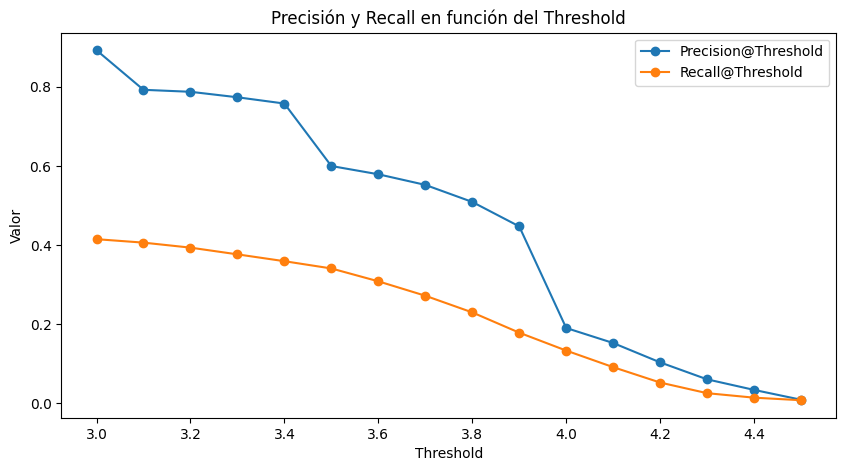

In [62]:
# Crear lista de thresholds utilizando numpy.arange()
thresholds = np.arange(3.0, 4.6, 0.1)

precision_thresholds = []
recall_thresholds = []

# Calcular precisión y recall para cada threshold
for threshold in thresholds:
    precisions, recalls = precision_recall_at_k(predictions_svd, k=10, threshold=threshold)
    precision_avg = sum(precisions.values()) / len(precisions)
    recall_avg = sum(recalls.values()) / len(recalls)
    precision_thresholds.append(precision_avg)
    recall_thresholds.append(recall_avg)

# Graficar precisión y recall en función del threshold
plt.figure(figsize=(10, 5))
plt.plot(thresholds, precision_thresholds, label='Precision@Threshold', marker='o')
plt.plot(thresholds, recall_thresholds, label='Recall@Threshold', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Valor')
plt.title('Precisión y Recall en función del Threshold')
plt.legend()
plt.show()


Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `Threshold`.

A diferencia del caso de `k`, a medida que aumentan los `Threshold` ambas métricas disminuyen su valor hasta 0 con `Threshold` = 4.5. 

In [63]:
all_user_item_pairs = [(uid, iid) for uid in df_surprise['userId'].unique() for iid in df_surprise['beerId'].unique()]

all_predictions = [svd_model.predict(uid, iid) for (uid, iid) in all_user_item_pairs]

ratings_matrix = pd.DataFrame(all_predictions, columns=['userId', 'beerId', 'r_ui', 'est', 'details']).pivot(index='userId', columns='beerId', values='est')
ratings_matrix.head()

beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,3.673862,3.946490,3.724033,3.760955,3.642750,3.698191,3.938752,3.849116,3.657198,4.052420,...,3.882512,4.039537,3.796194,4.039351,3.849718,4.101903,3.874025,4.297286,3.915308,3.609955
3,3.445693,3.782232,3.261267,3.531046,3.481349,3.477503,3.656532,3.636745,3.529898,3.781334,...,3.511801,3.758986,3.758369,3.870246,3.543020,3.888511,3.683283,4.036049,3.745069,3.488391
4,3.815285,4.095030,3.736759,3.886572,3.747298,3.809751,3.968697,3.990317,3.864446,4.111229,...,3.870264,4.105684,4.071427,4.162017,3.932258,4.239330,3.978548,4.332996,4.109829,3.853123
5,3.660790,3.944360,3.581878,3.634753,3.745914,3.440317,3.946065,3.818132,3.723393,3.986382,...,3.775658,4.069426,3.975310,4.108858,3.718240,4.103267,3.773783,4.174156,3.921823,3.772278
6,3.582658,4.014241,3.498457,4.005009,3.730073,3.808572,3.910474,3.855652,3.758459,4.110971,...,3.830724,4.099771,3.761942,4.139230,3.848532,4.026423,3.862599,4.264625,4.066650,3.789217


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
